In [1]:
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('assistment_data_corrected.csv', encoding="ISO-8859-1")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401756 entries, 0 to 401755
Data columns (total 30 columns):
order_id                401756 non-null int64
assignment_id           401756 non-null int64
user_id                 401756 non-null int64
assistment_id           401756 non-null int64
problem_id              401756 non-null int64
original                401756 non-null int64
correct                 401756 non-null int64
attempt_count           401756 non-null int64
ms_first_response       401756 non-null int64
tutor_mode              401756 non-null object
answer_type             401756 non-null object
sequence_id             401756 non-null int64
student_class_id        401756 non-null int64
position                401756 non-null int64
type                    401756 non-null object
base_sequence_id        401756 non-null int64
skill_id                338001 non-null float64
skill_name              325637 non-null object
teacher_id              401756 non-null int64
school_id

In [8]:
df = df[df['overlap_time'] > 0]
df = df[df['ms_first_response'] > 0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401427 entries, 0 to 401755
Data columns (total 30 columns):
order_id                401427 non-null int64
assignment_id           401427 non-null int64
user_id                 401427 non-null int64
assistment_id           401427 non-null int64
problem_id              401427 non-null int64
original                401427 non-null int64
correct                 401427 non-null int64
attempt_count           401427 non-null int64
ms_first_response       401427 non-null int64
tutor_mode              401427 non-null object
answer_type             401427 non-null object
sequence_id             401427 non-null int64
student_class_id        401427 non-null int64
position                401427 non-null int64
type                    401427 non-null object
base_sequence_id        401427 non-null int64
skill_id                337674 non-null float64
skill_name              325310 non-null object
teacher_id              401427 non-null int64
school_id

In [10]:
overlap_time = np.array(df['ms_first_response'])
correct = np.array(df['correct'])

In [11]:
print(np.min(overlap_time))

1


## Use logistic regression accuracy as a measure

In [12]:
x_train, x_test, y_train, y_test = train_test_split(overlap_time, correct, train_size=0.7)

/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
model = LogisticRegression()
model.fit(x_train.reshape(len(x_train), 1), y_train)

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
model.coef_

array([[1.15611585e-06]])

In [15]:
model.score(x_test.reshape(len(x_test), 1), y_test)

0.6436489549859253

So a 1-dimensional logistic regression model is able to get a 64% accuracy while predicting. Thus, there seems to be a pursuable relationship between these variables.

## Kolgomorov-Smirnov Test

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [17]:
wrong_ans = df[df['correct'] == 0]
correct_ans = df[df['correct'] == 1]

In [18]:
wrong_ans[:5]

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3.0
18,33392795,277618,70729,33169,51454,1,0,2,12898,tutor,...,0,4,27650,30060,NaN,14,0,NaN,1,1.0
20,33392838,277618,70729,33140,51425,1,0,2,27857,tutor,...,3,3,39933,30799,NaN,16,0,1.0,3,3.0
23,20421232,220674,70730,33178,51463,1,0,2,154880,tutor,...,0,4,296134,30060,NaN,12,0,NaN,1,1.0


In [19]:
wrong_ms_response = np.array(wrong_ans['ms_first_response'])
correct_ms_response = np.array(correct_ans['ms_first_response'])

In [20]:
wrong_ms_response = np.where(wrong_ms_response > 0)[0]
correct_ms_response = np.where(correct_ms_response > 0)[0]

/usr/local/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


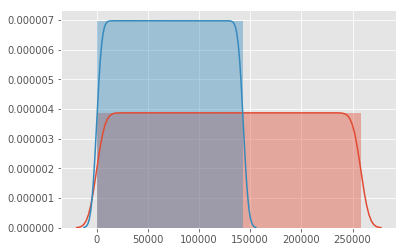

In [21]:
sns.distplot(correct_ms_response);
sns.distplot(wrong_ms_response);

In [22]:
len(wrong_ms_response)

143322

In [23]:
len(correct_ms_response)

258105

In [24]:
from scipy.stats import ks_2samp

In [25]:
ks_2samp(wrong_ms_response, correct_ms_response)

Ks_2sampResult(statistic=0.4447143604347068, pvalue=0.0)

Since the p-value is small (< 0.0), we reject the hypothesis that the two distributions are the same. Thus, we infer that the two distributions are significantly different, and that `ms_first_response` plays a role in determining `correct`.